In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_original = pd.read_csv('BankChurners.csv')
dropColumns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
               'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df = df_original.drop(columns=dropColumns)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [2]:
incomeRanges = df['Income_Category'].unique()

In [3]:
column_values = df['Education_Level'].unique()
index_values = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
incomeAllDf = pd.DataFrame(index = index_values, columns = column_values)
for income in incomeRanges:
    incomeCount = df.loc[df['Income_Category'] == income, ['Education_Level']].value_counts()
    incomeAllDf.loc[income, :] = incomeCount.values

In [4]:
incomeAllDf

,High School,Graduate,Uneducated,Unknown,College,Post-Graduate,Doctorate
Unknown,332,225,185,145,108,70,47
Less than $40K,1139,671,556,522,345,170,158
$40K - $60K,553,355,269,249,183,111,70
$60K - $80K,422,307,210,195,132,77,59
$80K - $120K,478,308,219,217,175,81,57
$120K +,204,147,120,119,70,37,30


In [6]:
for column in incomeAllDf.columns:
    incomeAllDf[column] = incomeAllDf[column] / incomeAllDf[column].sum()
incomeAllDf

,High School,Graduate,Uneducated,Unknown,College,Post-Graduate,Doctorate
Unknown,0.106138,0.111773,0.118666,0.100207,0.106614,0.128205,0.111639
Less than $40K,0.36413,0.333333,0.356639,0.360746,0.340573,0.311355,0.375297
$40K - $60K,0.17679,0.176354,0.172547,0.17208,0.180652,0.203297,0.166271
$60K - $80K,0.13491,0.152509,0.134702,0.134762,0.130306,0.141026,0.140143
$80K - $120K,0.152813,0.153005,0.140475,0.149965,0.172754,0.148352,0.135392
$120K +,0.0652174,0.0730253,0.0769724,0.0822391,0.0691017,0.0677656,0.0712589


This table represents the realtionship between the study level and the income range proportionally.

<AxesSubplot:>

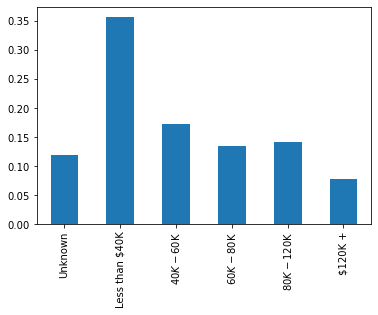

In [7]:
incomeAllDf['Uneducated'].plot(kind='bar')

<AxesSubplot:>

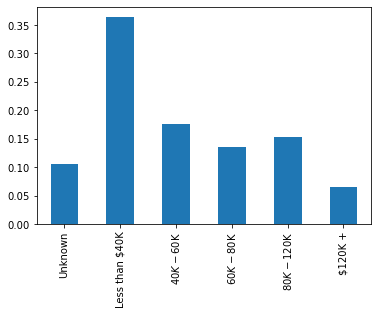

In [8]:
incomeAllDf['High School'].plot(kind='bar')

<AxesSubplot:>

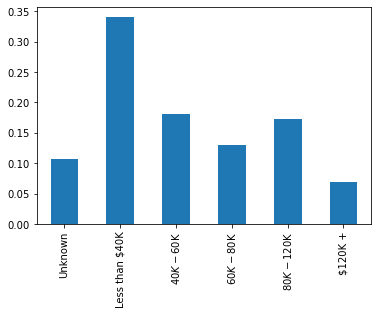

In [9]:
incomeAllDf['College'].plot(kind='bar')

<AxesSubplot:>

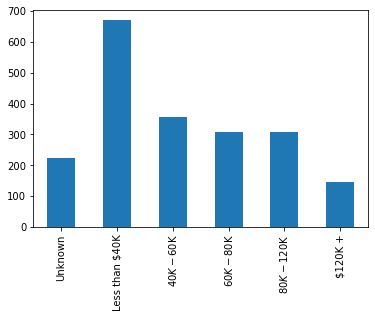

In [206]:
incomeAllDf['Graduate'].plot(kind='bar')

<AxesSubplot:>

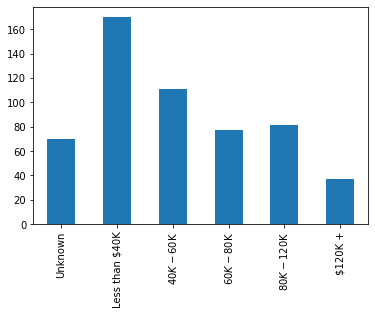

In [207]:
incomeAllDf['Post-Graduate'].plot(kind='bar')

<AxesSubplot:>

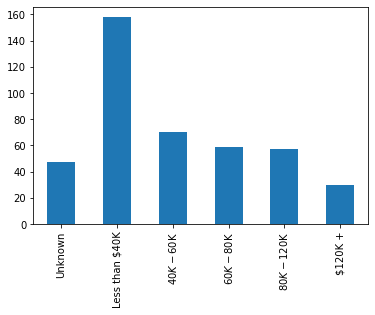

In [208]:
incomeAllDf['Doctorate'].plot(kind='bar')

We can observe in the data a trend to get higher sallary as higher are the studies, with post-graduated the better payd. It is interresting to mention that the Doctorate degree seems to be payed in the same way as uneducated. It is also interesting to mention that the higher proportion of people who fit in the lower range of salary, are the one with  Doctorate studies, and the hiher proportion of people who fit in the higher range of salary are the 